In [230]:
import os
import pandas as pd
import numpy as np

# Base directory paths
base_path = os.getcwd()  # Set to the current working directory or customize
source_files_path = os.path.join(base_path, "edgar/data")
simulation_output_path = os.path.join(base_path, "experiment_data/input_data")
output_path = os.path.join(base_path, "reports")

In [231]:
# Load mapping table
mapping = pd.read_csv(os.path.join(source_files_path, "mapping_2.csv"))

# Load raw simulation data
slt = pd.read_csv(os.path.join(simulation_output_path, "sisepuede_results_sisepuede_run.csv"))


In [232]:
slt.head()

,primary_id,region,time_period,area_agrc_crops_bevs_and_spices,area_agrc_crops_cereals,area_agrc_crops_fibers,area_agrc_crops_fruits,area_agrc_crops_herbs_and_other_perennial_crops,area_agrc_crops_nuts,area_agrc_crops_other_annual,...,yf_agrc_fruits_tonne_ha,yf_agrc_herbs_and_other_perennial_crops_tonne_ha,yf_agrc_nuts_tonne_ha,yf_agrc_other_annual_tonne_ha,yf_agrc_other_woody_perennial_tonne_ha,yf_agrc_pulses_tonne_ha,yf_agrc_rice_tonne_ha,yf_agrc_sugar_cane_tonne_ha,yf_agrc_tubers_tonne_ha,yf_agrc_vegetables_and_vines_tonne_ha
0,0,georgia,0,68043.892566,151354.043079,31404.873492,81856.221185,105627.965703,57648.297868,76258.593271,...,14.251229,27.557750,0.921311,0.813395,0.0,3.30693,3.306930,39.202663,16.072745,15.929195
1,0,georgia,1,68038.488033,151342.021458,31402.379092,81849.719578,105619.575974,57643.719028,76252.536268,...,12.808034,27.557750,0.918334,0.816150,0.0,3.30693,3.306930,47.312358,15.460559,15.108558
2,0,georgia,2,68086.083016,151447.889786,31424.346007,81906.975936,105693.460067,57684.042555,76305.877226,...,12.624132,27.610771,0.916130,0.821111,0.0,3.30693,3.307371,50.557338,15.350089,15.005724
3,0,georgia,3,68101.985288,151483.262148,31431.685518,81926.106234,105718.145966,57697.515314,76323.699324,...,13.037755,33.069300,0.918555,0.816922,0.0,3.30693,3.790844,52.388716,16.958543,14.721163
4,0,georgia,4,68085.153665,151445.822575,31423.917076,81905.857934,105692.017388,57683.255188,76304.835678,...,10.743510,27.557750,0.917673,0.818024,0.0,3.30693,4.158464,50.068133,13.796953,13.766562


In [233]:
mapping['Edgar_Class'] = mapping['Edgar_Class'].str.replace(' ', '', regex=False)
mapping['Edgar_Class'] = mapping['Edgar_Class'].str.replace(' ', '_').str.replace('-', '_')
mapping['Edgar_Class'] = mapping['Edgar_Class'].str.replace(':', '_')
mapping['Edgar_Class'] = mapping['Edgar_Class'].str.replace('/', '')

In [234]:
mapping.head()

,Subsector,Gas,Edgar_Class,Edgar_Subsector,Edgar_Sector,Vars
0,lvst,ch4,AG_Livestock_CH4,AG - Livestock,Agriculture,emission_co2e_ch4_lvst_entferm_buffalo:emissio...
1,lsmm,ch4,AG_Livestock_CH4,AG - Livestock,Agriculture,emission_co2e_ch4_lsmm_anaerobic_digester:emis...
2,lsmm,n2o,AG_Livestock_N2O,AG - Livestock,Agriculture,emission_co2e_n2o_lsmm_anaerobic_digester:emis...
3,agrc,co2,AG_Crops_CO2,AG - Crops,Agriculture,emission_co2e_co2_agrc_biomass_bevs_and_spices...
4,agrc,ch4,AG_Crops_CH4,AG - Crops,Agriculture,emission_co2e_ch4_agrc_anaerobicdom_rice:emiss...


In [235]:
for i in range(len(mapping)):
    vars_ = mapping.loc[i, 'Vars'].split(":")
    slt[mapping.loc[i, 'Edgar_Class']] = slt[vars_].sum(axis=1)
    print(mapping.loc[i, 'Edgar_Class'])

AG_Livestock_CH4
AG_Livestock_CH4
AG_Livestock_N2O
AG_Crops_CO2
AG_Crops_CH4
AG_Crops_N2O
EN_Building_CO2
EN_Building_CH4
EN_Building_N2O
EN_ElectricityHeat_CO2
EN_ElectricityHeat_CH4
EN_ElectricityHeat_N2O
EN_FugitiveEmissions_CO2
EN_FugitiveEmissions_CH4
EN_FugitiveEmissions_N2O
EN_ManufacturingConstruction_CO2
EN_ManufacturingConstruction_CH4
EN_ManufacturingConstruction_N2O
EN_Transportation_CO2
EN_Transportation_CH4
EN_Transportation_N2O
IN_IndustrialProcesses_CO2
IN_IndustrialProcesses_CH4
IN_IndustrialProcesses_N2O
IN_IndustrialProcesses_HFCc2f6
IN_IndustrialProcesses_HFCc2h3f3
IN_IndustrialProcesses_HFCc2hf5
IN_IndustrialProcesses_HFCc3f8
IN_IndustrialProcesses_HFCc3h2f6
IN_IndustrialProcesses_HFCc3h3f5
IN_IndustrialProcesses_HFCc3hf7
IN_IndustrialProcesses_HFCc4f10
IN_IndustrialProcesses_HFCc4f6
IN_IndustrialProcesses_HFCc4h5f5
IN_IndustrialProcesses_HFCc5f12
IN_IndustrialProcesses_HFCc5f8
IN_IndustrialProcesses_HFCc5h2f10
IN_IndustrialProcesses_HFCc6f14
IN_IndustrialProcesses

In [236]:
sectors = mapping['Edgar_Class'].unique().tolist()
sectors

['AG_Livestock_CH4',
 'AG_Livestock_N2O',
 'AG_Crops_CO2',
 'AG_Crops_CH4',
 'AG_Crops_N2O',
 'EN_Building_CO2',
 'EN_Building_CH4',
 'EN_Building_N2O',
 'EN_ElectricityHeat_CO2',
 'EN_ElectricityHeat_CH4',
 'EN_ElectricityHeat_N2O',
 'EN_FugitiveEmissions_CO2',
 'EN_FugitiveEmissions_CH4',
 'EN_FugitiveEmissions_N2O',
 'EN_ManufacturingConstruction_CO2',
 'EN_ManufacturingConstruction_CH4',
 'EN_ManufacturingConstruction_N2O',
 'EN_Transportation_CO2',
 'EN_Transportation_CH4',
 'EN_Transportation_N2O',
 'IN_IndustrialProcesses_CO2',
 'IN_IndustrialProcesses_CH4',
 'IN_IndustrialProcesses_N2O',
 'IN_IndustrialProcesses_HFCc2f6',
 'IN_IndustrialProcesses_HFCc2h3f3',
 'IN_IndustrialProcesses_HFCc2hf5',
 'IN_IndustrialProcesses_HFCc3f8',
 'IN_IndustrialProcesses_HFCc3h2f6',
 'IN_IndustrialProcesses_HFCc3h3f5',
 'IN_IndustrialProcesses_HFCc3hf7',
 'IN_IndustrialProcesses_HFCc4f10',
 'IN_IndustrialProcesses_HFCc4f6',
 'IN_IndustrialProcesses_HFCc4h5f5',
 'IN_IndustrialProcesses_HFCc5f12',


In [237]:
emission = [col for col in slt.columns if col.startswith("emission_")]
emission

['emission_co2e_c2f6_ippu_product_use_product_use_ods_other',
 'emission_co2e_c2f6_ippu_production_chemicals',
 'emission_co2e_c2f6_ippu_production_electronics',
 'emission_co2e_c2f6_ippu_production_metals',
 'emission_co2e_c2h3f3_ippu_product_use_product_use_ods_refrigeration',
 'emission_co2e_c2h3f3_ippu_production_chemicals',
 'emission_co2e_c2hf5_ippu_product_use_product_use_ods_other',
 'emission_co2e_c2hf5_ippu_product_use_product_use_ods_refrigeration',
 'emission_co2e_c2hf5_ippu_production_chemicals',
 'emission_co2e_c3f8_ippu_production_chemicals',
 'emission_co2e_c3f8_ippu_production_electronics',
 'emission_co2e_c3h2f6_ippu_product_use_product_use_ods_other',
 'emission_co2e_c3h2f6_ippu_product_use_product_use_ods_refrigeration',
 'emission_co2e_c3h3f5_ippu_product_use_product_use_ods_other',
 'emission_co2e_c3h3f5_ippu_product_use_product_use_ods_refrigeration',
 'emission_co2e_c3hf7_ippu_product_use_product_use_ods_other',
 'emission_co2e_c3hf7_ippu_product_use_product_use

In [238]:
columns_drop = ['primary_id', 'region', 'time_period'] + sectors + emission

In [239]:
X = slt.drop(columns=columns_drop, axis=1)
y = slt['EN_FugitiveEmissions_CO2']


In [ ]:
# zero's
X = X.loc[:, (X != 0).all(axis=0)]

In [241]:
# NaN
columns_with_nan = X.columns[X.isna().any()].tolist()
print(columns_with_nan)

[]


In [242]:
from sklearn.preprocessing import scale

X_scale = scale(X, axis=0)
y_scale = scale(y, axis=0)

/home/fabian_fuentes/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:247: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(random_state = 666)
rfc.fit(X_scale,y_scale)

RandomForestRegressor(random_state=666)

In [260]:
feature_imp = pd.Series(rfc.feature_importances_,index = X.columns).sort_values(ascending=False)
feature_imp

qty_lsmm_n_to_fertilizer_dry_lot_kt                     0.221559
energy_demand_enfu_total_fuel_natural_gas               0.096828
nemomod_entc_discounted_operating_costs_pp_solar        0.068523
nemomod_entc_annual_production_by_technology_pp_wind    0.038268
pij_lndu_forests_primary_to_forests_primary             0.037955
                                                          ...   
frac_agrc_nuts_cl1_temperate                            0.000000
frac_agrc_no_till_other_annual                          0.000000
ef_fgtv_production_venting_tonne_co2_per_m3_fuel_oil    0.000000
frac_agrc_n_in_below_ground_residue_tubers              0.000000
energydensity_enfu_mj_per_litre_fuel_diesel             0.000000
Length: 1945, dtype: float64

In [261]:
feature_imp = feature_imp.nlargest(20)
feature_imp

qty_lsmm_n_to_fertilizer_dry_lot_kt                       0.221559
energy_demand_enfu_total_fuel_natural_gas                 0.096828
nemomod_entc_discounted_operating_costs_pp_solar          0.068523
nemomod_entc_annual_production_by_technology_pp_wind      0.038268
pij_lndu_forests_primary_to_forests_primary               0.037955
qty_trww_sludge_produced_treated_septic_tonne             0.029507
energylost_enfu_transmission_loss_fuel_electricity_pj     0.029357
area_lndu_conversion_from_forests_primary_to_wetlands     0.028135
exportsadj_enfu_fuel_hydrocarbon_gas_liquids              0.020956
energy_consumption_electricity_inen_lime_and_carbonite    0.019336
energy_demand_enfu_subsector_total_pj_entc_fuel_solar     0.019262
pop_lvst_cattle_nondairy                                  0.019209
qty_lvst_domestic_animal_mass_mt                          0.019167
energy_demand_enfu_total_fuel_wind                        0.019133
area_lndu_improved_croplands                              0.01

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


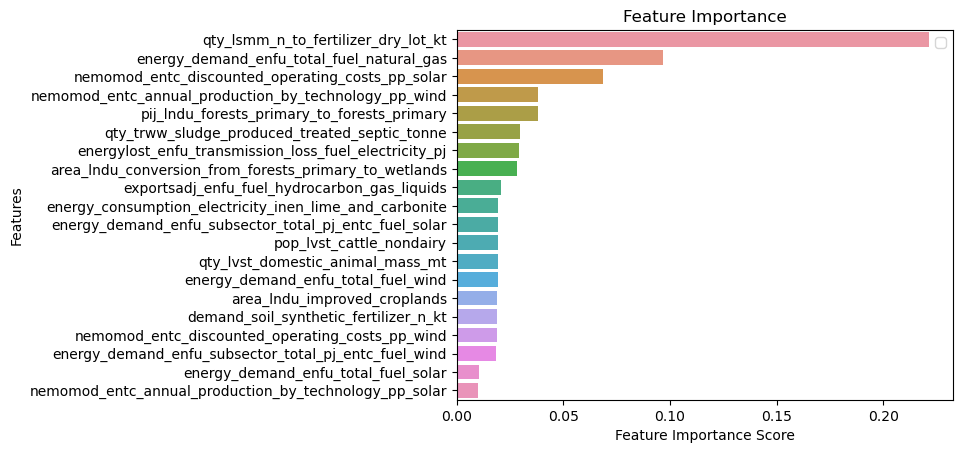

In [262]:
from matplotlib import pyplot as plt
import seaborn as sns


# Graficamente:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.legend()
plt.show()